#### Line plot

In [ ]:
# create a line plot
from pandas import read_csv
from matplotlib import pyplot
import pandas as pd

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving coke.csv to coke (2).csv


In [ ]:
series = read_csv('coke.csv')

series["year"]='19'+series["Quarter"].str[-2:]
series["qtr"]=series["Quarter"].str[1:2]
series.head


<bound method NDFrame.head of    Quarter        Sales  year qtr
0    Q1_86  1734.827000  1986   1
1    Q2_86  2244.960999  1986   2
2    Q3_86  2533.804993  1986   3
3    Q4_86  2154.962997  1986   4
4    Q1_87  1547.818996  1987   1
5    Q2_87  2104.411995  1987   2
6    Q3_87  2014.362999  1987   3
7    Q4_87  1991.746998  1987   4
8    Q1_88  1869.049999  1988   1
9    Q2_88  2313.631996  1988   2
10   Q3_88  2128.320000  1988   3
11   Q4_88  2026.828999  1988   4
12   Q1_89  1910.603996  1989   1
13   Q2_89  2331.164993  1989   2
14   Q3_89  2206.549995  1989   3
15   Q4_89  2173.967995  1989   4
16   Q1_90  2148.278000  1990   1
17   Q2_90  2739.307999  1990   2
18   Q3_90  2792.753998  1990   3
19   Q4_90  2556.009995  1990   4
20   Q1_91  2480.973999  1991   1
21   Q2_91  3039.522995  1991   2
22   Q3_91  3172.115997  1991   3
23   Q4_91  2879.000999  1991   4
24   Q1_92  2772.000000  1992   1
25   Q2_92  3550.000000  1992   2
26   Q3_92  3508.000000  1992   3
27   Q4_92  3243.8

In [ ]:
series["period"]=pd.to_datetime(series['year'].astype(str) + 'Q' + series['qtr'].astype(str))

In [ ]:
coke1=series.copy()

In [ ]:
coke1=coke1.drop(columns="Quarter",axis=1)


In [ ]:
coke1=coke1.drop(columns="year",axis=1)

In [ ]:
coke1=coke1.drop(columns='qtr',axis=1)

In [ ]:
first_column = coke1.pop('period')
coke1.insert(0, 'period', first_column)

In [ ]:
coke1

,period,Sales
0,1986-01-01,1734.827000
1,1986-04-01,2244.960999
2,1986-07-01,2533.804993
3,1986-10-01,2154.962997
4,1987-01-01,1547.818996
5,1987-04-01,2104.411995
6,1987-07-01,2014.362999
7,1987-10-01,1991.746998
8,1988-01-01,1869.049999
9,1988-04-01,2313.631996


#### Histogram and Density Plots

In [ ]:
# create a histogram plot
from pandas import read_csv
from matplotlib import pyplot

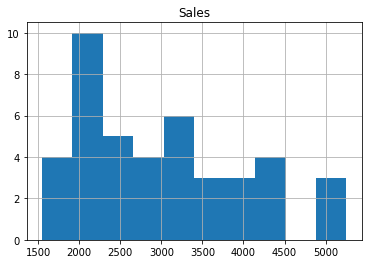

In [ ]:

coke1.hist()
pyplot.show()

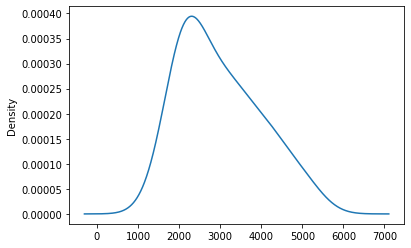

In [ ]:
# create a density plot
from pandas import read_csv
from matplotlib import pyplot

coke1["Sales"].plot(kind='kde')
pyplot.show()

#### Box and Whisker Plots by Interval

In [ ]:
import pandas as pd
import datetime


In [ ]:
# create a boxplot of yearly data
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot

groups = coke1.groupby(Grouper(key='period',freq='Y')).mean()
years = DataFrame()
years=groups

In [ ]:
years.shape

(11, 1)

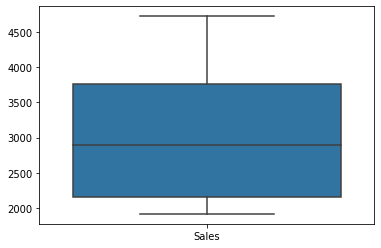

In [ ]:
import seaborn as sns
sns.boxplot(data=years)

In [ ]:
coke1.columns

Index(['period', 'Sales'], dtype='object')

#### Lag plot

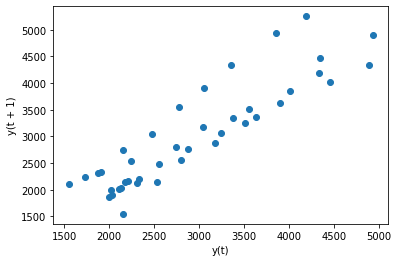

In [ ]:
# create a scatter plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot

lag_plot(coke1["Sales"])
pyplot.show()

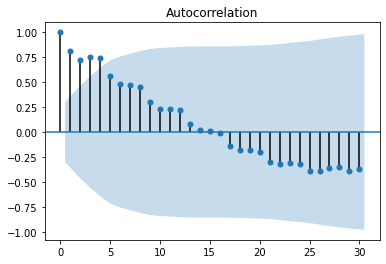

In [ ]:
# create an autocorrelation plot
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(coke1["Sales"],lags=30)
pyplot.show()

In [ ]:
upsampled = groups.resample('M').mean()
print(upsampled)

                  Sales
period                 
1986-12-31  2167.138997
1987-01-31          NaN
1987-02-28          NaN
1987-03-31          NaN
1987-04-30          NaN
...                 ...
1996-08-31          NaN
1996-09-30          NaN
1996-10-31          NaN
1996-11-30          NaN
1996-12-31  4723.500000

[121 rows x 1 columns]


##### interpolate the missing value

                  Sales
period                 
1986-12-31  2167.138997
1987-01-31  2146.092851
1987-02-28  2125.046705
1987-03-31  2104.000560
1987-04-30  2082.954414
1987-05-31  2061.908268
1987-06-30  2040.862122
1987-07-31  2019.815976
1987-08-31  1998.769830
1987-09-30  1977.723685
1987-10-31  1956.677539
1987-11-30  1935.631393
1987-12-31  1914.585247
1988-01-31  1928.741289
1988-02-29  1942.897331
1988-03-31  1957.053372
1988-04-30  1971.209414
1988-05-31  1985.365456
1988-06-30  1999.521498
1988-07-31  2013.677540
1988-08-31  2027.833581
1988-09-30  2041.989623
1988-10-31  2056.145665
1988-11-30  2070.301707
1988-12-31  2084.457748
1989-01-31  2090.383915
1989-02-28  2096.310081
1989-03-31  2102.236248
1989-04-30  2108.162414
1989-05-31  2114.088580
1989-06-30  2120.014747
1989-07-31  2125.940913


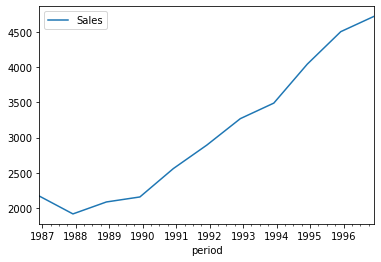

In [ ]:
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
pyplot.show()

#### Downsampling Data

In [ ]:
# downsample to quarterly intervals
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
resample = groups.resample('Q')
quarterly_mean_sales = resample.mean()

In [ ]:
quarterly_mean_sales.head()

,Sales
period,
1986-12-31,2167.138997
1987-03-31,NaN
1987-06-30,NaN
1987-09-30,NaN
1987-12-31,1914.585247


# Tranformations

In [ ]:
# load and plot a time series
from pandas import read_csv
from matplotlib import pyplot

In [ ]:
coke1.dtypes

period    datetime64[ns]
Sales            float64
dtype: object

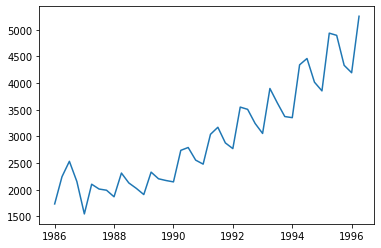

In [ ]:
# line plot
pyplot.subplot()
pyplot.plot('period','Sales',data=coke1)


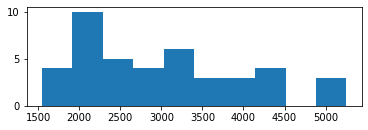

In [ ]:
# histogram
pyplot.subplot(212)
pyplot.hist('Sales',data=coke1)
pyplot.show()

#### Square Root Transform

In [ ]:
from pandas import read_csv
from pandas import DataFrame
from numpy import sqrt
from matplotlib import pyplot

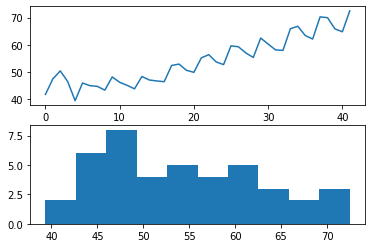

In [ ]:
# line plot
pyplot.subplot(211)
pyplot.plot(sqrt(coke1["Sales"]))
# histogram
pyplot.subplot(212)
pyplot.hist(sqrt(coke1["Sales"]))
pyplot.show()

#### Log Transform

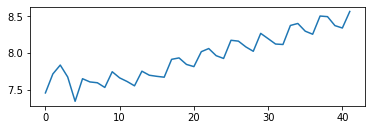

In [ ]:
from numpy import log


# line plot
pyplot.subplot(211)
pyplot.plot(log(coke1['Sales']))



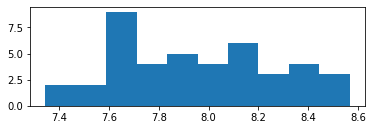

In [ ]:
pyplot.subplot(212)
pyplot.hist(log(coke1['Sales']))
pyplot.show()

                  Sales
period                 
1986-12-31  2167.138997
1987-03-31          NaN
1987-06-30          NaN
1987-09-30          NaN
1987-12-31  1914.585247


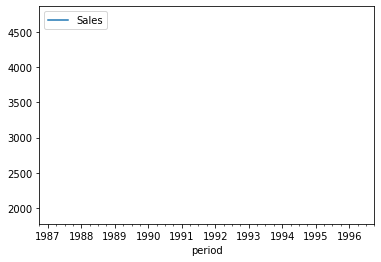

In [ ]:
print(quarterly_mean_sales.head())
quarterly_mean_sales.plot()
pyplot.show()

Forecasting - Data driven

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

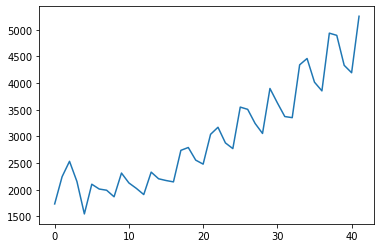

In [ ]:
coke1.Sales.plot()



##Splitting data

In [ ]:
coke1.shape

(42, 2)

In [ ]:
Train = coke1.head(30)
Test = coke1.tail(12)

# Moving Average 

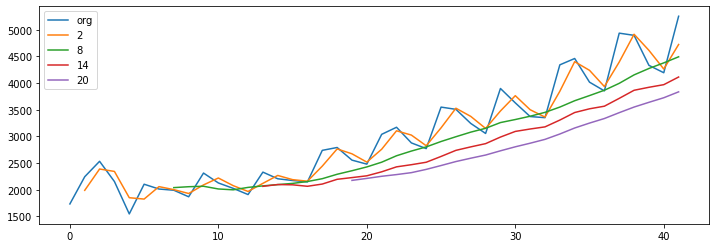

In [ ]:
plt.figure(figsize=(12,4))
coke.Sales.plot(label="org")
for i in range(2,24,6):
    coke1["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot 


In [ ]:
coke1.dtypes

period    datetime64[ns]
Sales            float64
dtype: object

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


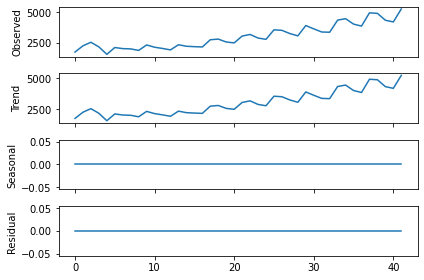

In [ ]:
decompose_ts_add = seasonal_decompose(coke1.Sales,freq = True)
decompose_ts_add.plot()
plt.show()


# ACF plots and PACF plots


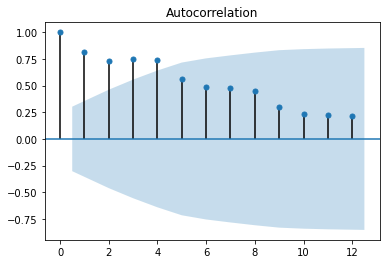

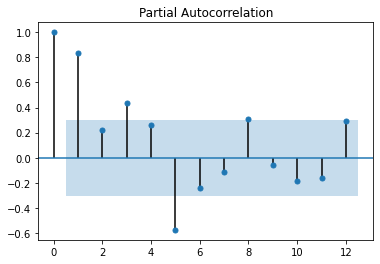

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(coke1.Sales,lags=12)
tsa_plots.plot_pacf(coke1.Sales,lags=12)
plt.show()


Evaluation Metric MAPE

Simple Exponential Method

In [ ]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [ ]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 

22.046761695405966

### Holt method 

In [ ]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

11.213841510532538

Holts winter exponential smoothing with additive seasonality and additive trend

In [ ]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


8.817871631625444

Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [ ]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

7.597154167859881

## Final Model by combining train and test

In [ ]:
hwe_model_add_add = ExponentialSmoothing(coke["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [ ]:
hwe_model_add_add.forecast(12)

42    4944.457509
43    4760.832656
44    4794.901408
45    5679.629101
46    5708.259478
47    5275.627658
48    5156.192199
49    6126.080565
50    5998.853126
51    5520.545419
52    5453.831512
53    6368.090979
dtype: float64

Forecasting_Model based methods

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

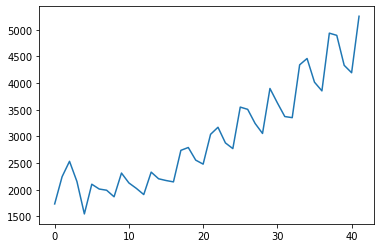

In [ ]:

coke1.Sales.plot()

In [ ]:
coke1

,period,Sales
0,1986-01-01,1734.827000
1,1986-04-01,2244.960999
2,1986-07-01,2533.804993
3,1986-10-01,2154.962997
4,1987-01-01,1547.818996
5,1987-04-01,2104.411995
6,1987-07-01,2014.362999
7,1987-10-01,1991.746998
8,1988-01-01,1869.049999
9,1988-04-01,2313.631996


In [ ]:


coke1['t'] = coke1.index +1


In [ ]:
coke1['log(Sales)']=np.log(coke1.iloc[:,1])

In [ ]:
coke1['t-square']=coke1.iloc[:,2]*coke1.iloc[:,2]

In [ ]:
coke1.head()

,period,Sales,t,log(Sales)
0,1986-01-01,1734.827000,1,7.458663
1,1986-04-01,2244.960999,2,7.716443
2,1986-07-01,2533.804993,3,7.837477
3,1986-10-01,2154.962997,4,7.675529
4,1987-01-01,1547.818996,5,7.344602


In [ ]:
coke1["Date"] = pd.to_datetime(coke1.period,format="%b-%y")
#look for c standard format codes

# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

coke1["month"] = coke1.Date.dt.strftime("%b") # month extraction
coke1["year"] = coke1.Date.dt.strftime("%Y") # year extraction



In [ ]:
enc_data=pd.get_dummies(coke['month'])

In [ ]:
enc_data


,Apr,Jan,Jul,Oct
0,0,1,0,0
1,1,0,0,0
2,0,0,1,0
3,0,0,0,1
4,0,1,0,0
5,1,0,0,0
6,0,0,1,0
7,0,0,0,1
8,0,1,0,0
9,1,0,0,0


In [ ]:
seriesmodel=coke1.iloc[:,0:].join(enc_data)

In [ ]:
seriesmodel

,period,Sales,t,log(Sales),Date,month,year,t-square,Apr,Jan,Jul,Oct
0,1986-01-01,1734.827000,1,7.458663,1986-01-01,Jan,1986,1,0,1,0,0
1,1986-04-01,2244.960999,2,7.716443,1986-04-01,Apr,1986,4,1,0,0,0
2,1986-07-01,2533.804993,3,7.837477,1986-07-01,Jul,1986,9,0,0,1,0
3,1986-10-01,2154.962997,4,7.675529,1986-10-01,Oct,1986,16,0,0,0,1
4,1987-01-01,1547.818996,5,7.344602,1987-01-01,Jan,1987,25,0,1,0,0
5,1987-04-01,2104.411995,6,7.651791,1987-04-01,Apr,1987,36,1,0,0,0
6,1987-07-01,2014.362999,7,7.608058,1987-07-01,Jul,1987,49,0,0,1,0
7,1987-10-01,1991.746998,8,7.596767,1987-10-01,Oct,1987,64,0,0,0,1
8,1988-01-01,1869.049999,9,7.533186,1988-01-01,Jan,1988,81,0,1,0,0
9,1988-04-01,2313.631996,10,7.746574,1988-04-01,Apr,1988,100,1,0,0,0


In [ ]:
seriesmodel.shape

(42, 12)

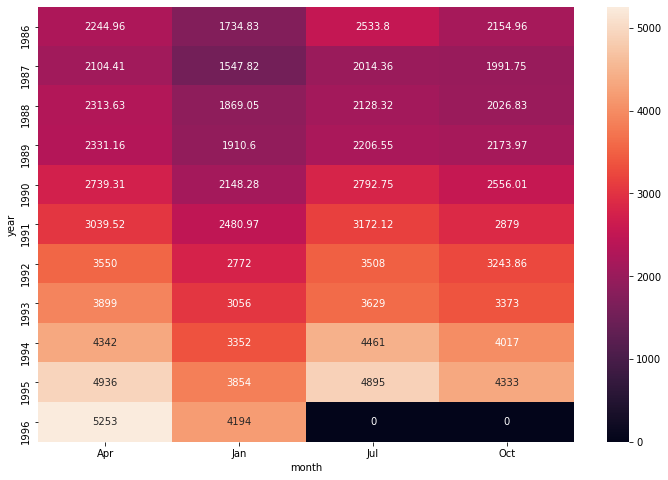

In [ ]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=seriesmodel,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values


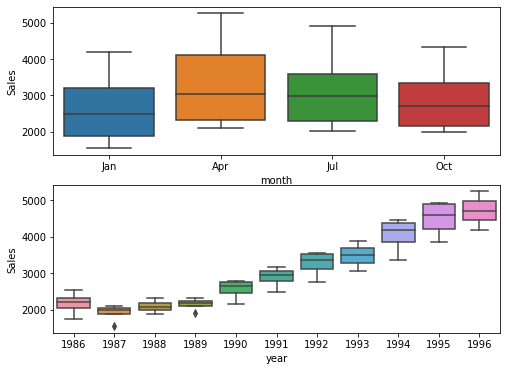

In [ ]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Sales",data=seriesmodel)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=seriesmodel)

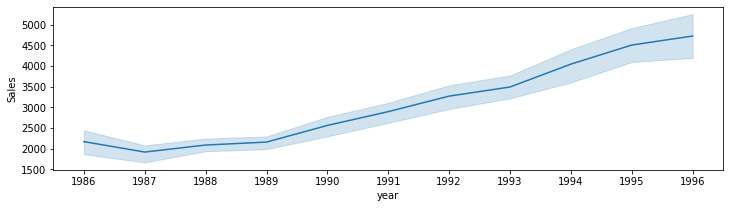

In [ ]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Sales",data=seriesmodel)

Splitting data

In [ ]:
Train = seriesmodel.head(30)
Test = seriesmodel.tail(12)

In [ ]:
Train

,period,Sales,t,log(Sales),Date,month,year,t-square,Apr,Jan,Jul,Oct
0,1986-01-01,1734.827000,1,7.458663,1986-01-01,Jan,1986,1,0,1,0,0
1,1986-04-01,2244.960999,2,7.716443,1986-04-01,Apr,1986,4,1,0,0,0
2,1986-07-01,2533.804993,3,7.837477,1986-07-01,Jul,1986,9,0,0,1,0
3,1986-10-01,2154.962997,4,7.675529,1986-10-01,Oct,1986,16,0,0,0,1
4,1987-01-01,1547.818996,5,7.344602,1987-01-01,Jan,1987,25,0,1,0,0
5,1987-04-01,2104.411995,6,7.651791,1987-04-01,Apr,1987,36,1,0,0,0
6,1987-07-01,2014.362999,7,7.608058,1987-07-01,Jul,1987,49,0,0,1,0
7,1987-10-01,1991.746998,8,7.596767,1987-10-01,Oct,1987,64,0,0,0,1
8,1988-01-01,1869.049999,9,7.533186,1988-01-01,Jan,1988,81,0,1,0,0
9,1988-04-01,2313.631996,10,7.746574,1988-04-01,Apr,1988,100,1,0,0,0


In [ ]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

714.0144483281364

In [ ]:
#Exponential

Exp = smf.ols('log(Sales)~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


552.2821039079417

In [ ]:
#Quadratic 

Quad = smf.ols('Sales~t+t-square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t-square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

714.0144483281364

In [ ]:
#Additive seasonality 

add_sea = smf.ols('Sales~Jan+Apr+Jul+Oct',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Apr','Jul','Oct']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1778.0065467941292

In [ ]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t-square+Jan+Apr+Jul+Oct',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Apr','Jul','Oct','t','t-square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

637.9404646964657

In [ ]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log(Sales)~Jan+Apr+Jul+Oct',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1828.9238912138035

In [ ]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log(Sales)~t+Jan+Apr+Jul+Oct',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

410.249705960836

In [ ]:
pred=np.exp(pred_Mult_add_sea)

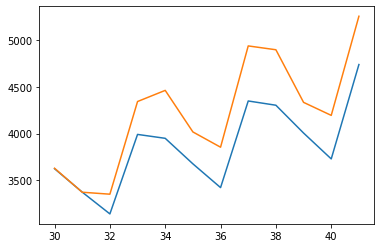

In [ ]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
pred.plot()
Test["Sales"].plot()
pyplot.show()


In [ ]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,410.249706
1,rmse_Exp,552.282104
4,rmse_add_sea_quad,637.940465
0,rmse_linear,714.014448
2,rmse_Quad,714.014448
3,rmse_add_sea,1778.006547
5,rmse_Mult_sea,1828.923891


Predict for new time period

In [ ]:
from google.colab import files
up=files.upload()

Saving Predict_new.csv to Predict_new.csv


In [ ]:
predict_data = pd.read_csv("Predict_new.csv")

In [ ]:
#Build the model on entire data set
model_full = smf.ols('Sales~t+t-square+Jan+Apr+Jul+Oct',data=seriesmodel).fit()

In [ ]:
pred_new  = pd.Series(Mul_Add_sea.predict(predict_data))
pred_new

0     10.992366
1      9.426270
2      9.447704
3     11.024730
4      9.490572
5      9.512006
6     10.996056
7      9.554873
8      9.576307
9     10.967407
10     9.619175
11     9.640609
dtype: float64

In [ ]:
pred_new["Sales"]=np.exp(pred_new)

In [ ]:
pred_new["Sales"]

0     59418.802011
1     12410.147908
2     12679.017471
3     61373.309027
4     13234.358219
5     13521.084545
6     59638.471606
7     14113.307816
8     14419.076848
9     57954.128110
10    15050.632166
11    15376.708610
dtype: float64

Forecasting Model_Arima

In [ ]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
cokearima=coke1.copy()

In [ ]:
ckarima=cokearima.iloc[:,0:2]
ckarima

,period,Sales
0,1986-01-01,1734.827000
1,1986-04-01,2244.960999
2,1986-07-01,2533.804993
3,1986-10-01,2154.962997
4,1987-01-01,1547.818996
5,1987-04-01,2104.411995
6,1987-07-01,2014.362999
7,1987-10-01,1991.746998
8,1988-01-01,1869.049999
9,1988-04-01,2313.631996


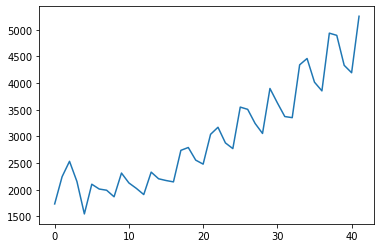

In [ ]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
ckarima["Sales"].plot()
pyplot.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f334d51c990>]],
      dtype=object)

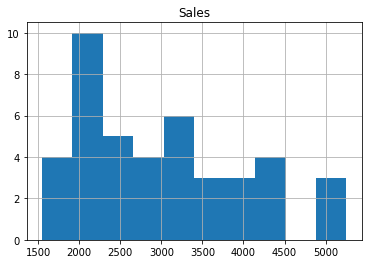

In [ ]:
ckarima.hist()

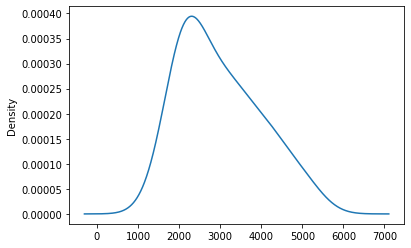

In [ ]:
ckarima["Sales"].plot(kind='kde')

In [ ]:
ckarima["Sales"]=ckarima["Sales"].astype(float)
ckarima["period"] = pd.to_datetime(ckarima.period,format="%b-%y")
arima=ckarima["Sales"]

In [ ]:
# separate out a validation dataset
split_point = len(arima) - 10
dataset, validation = arima[0:split_point], arima[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 32, Validation 10


In [ ]:
dataset

0     1734.827000
1     2244.960999
2     2533.804993
3     2154.962997
4     1547.818996
5     2104.411995
6     2014.362999
7     1991.746998
8     1869.049999
9     2313.631996
10    2128.320000
11    2026.828999
12    1910.603996
13    2331.164993
14    2206.549995
15    2173.967995
16    2148.278000
17    2739.307999
18    2792.753998
19    2556.009995
20    2480.973999
21    3039.522995
22    3172.115997
23    2879.000999
24    2772.000000
25    3550.000000
26    3508.000000
27    3243.859993
28    3056.000000
29    3899.000000
30    3629.000000
31    3373.000000
Name: Sales, dtype: float64

Persistence/ Base model

In [ ]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [ ]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    
# observation
    obs =test[i]
    history.append(obs)
   
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
   
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=2173.968, Expected=2148.278
>Predicted=2148.278, Expected=2739.308
>Predicted=2739.308, Expected=2792.754
>Predicted=2792.754, Expected=2556.010
>Predicted=2556.010, Expected=2480.974
>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000
RMSE: 387.510


ARIMA Hyperparameters

In [ ]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [ ]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
#p_values = range(0, 5)
#d_values = range(0, 5)
#q_values = range(0, 5)
warnings.filterwarnings("ignore")
#evaluate_models(train.values, p_values, d_values, q_values)

In [ ]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [ ]:
coke

,period,Sales,t,log(Sales),t-square,month,year
0,1986-01-01,1734.827000,1,7.458663,1,Jan,1986
1,1986-04-01,2244.960999,2,7.716443,4,Apr,1986
2,1986-07-01,2533.804993,3,7.837477,9,Jul,1986
3,1986-10-01,2154.962997,4,7.675529,16,Oct,1986
4,1987-01-01,1547.818996,5,7.344602,25,Jan,1987
5,1987-04-01,2104.411995,6,7.651791,36,Apr,1987
6,1987-07-01,2014.362999,7,7.608058,49,Jul,1987
7,1987-10-01,1991.746998,8,7.596767,64,Oct,1987
8,1988-01-01,1869.049999,9,7.533186,81,Jan,1988
9,1988-04-01,2313.631996,10,7.746574,100,Apr,1988


In [ ]:
train

0
0     1734.827000
1     2244.960999
2     2533.804993
3     2154.962997
4     1547.818996
5     2104.411995
6     2014.362999
7     1991.746998
8     1869.049999
9     2313.631996
10    2128.320000
11    2026.828999
12    1910.603996
13    2331.164993
14    2206.549995
15    2173.967995
16    2148.278000
17    2739.307999
18    2792.753998
19    2556.009995
20    2480.973999
21    3039.522995
22    3172.115997
23    2879.000999
24    2772.000000
25    3550.000000
26    3508.000000
27    3243.859993
28    3056.000000
29    3899.000000
30    3629.000000
31    3373.000000
Name: 1, dtype: float64

In [ ]:
# load data

# prepare data
X = train.values
X = X.astype('float32')

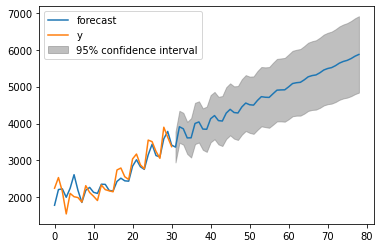

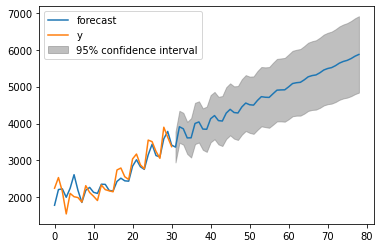

In [ ]:
# fit model
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 79)

In [ ]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse =sqrt(mean_squared_error(val[1], forecast))
rmse

631.6626362641357

Inference*:Comparing the root mean square error,the least rmse 387  is obtained with Persistence/ Base  Naive's model